# Generating movements

This notebooks demonstrates how to geneate simulated movements using the `movements` module of the of the ``monalysa`` library.

Contact siva82kb@gmail.com for any queries.

### Install the most recent monalysa library

```python
!pip install monalysa
```

In [1]:
import sys
sys.path.append('../../../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from monalysa import movements

## 1. Generating different types of movements

The `movements` package from the ``monalysa`` library can be used for generating different types of movements.

## 1.1 Discrete movements
We will use ``movements.gaussian_discrete_movement`` to generate Gaussian movements.

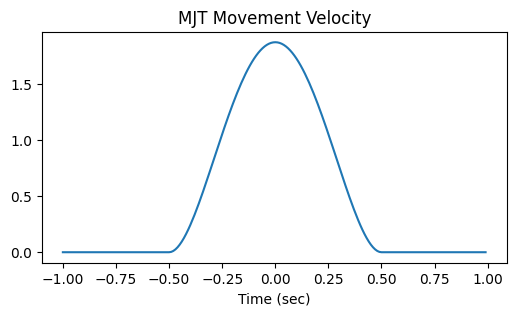

In [7]:
import numpy as np
from monalysa import movements
t = np.arange(-1, 1, 0.01)
move = movements.mjt_discrete_movement(time=t)
# Plot the generated Gaussian movement.
fig = plt.figure(figsize=(6, 3))
plt.plot(t, move)
plt.title("MJT Movement Velocity");
plt.xlabel("Time (sec)")
fig.savefig("mjt_movement.svg", format="svg")

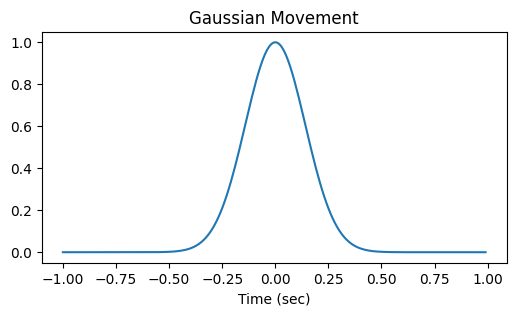

In [8]:
t = np.arange(-1, 1, 0.01)
move = movements.gaussian_discrete_movement(time=t)

# Plot the generated Gaussian movement.
fig = plt.figure(figsize=(6, 3))
plt.plot(t, move)
plt.title("Gaussian Movement");
plt.xlabel("Time (sec)")
fig.savefig("gaussian_movement.svg", format="svg")

The amplitude, duration, and location of the movement can be modified.

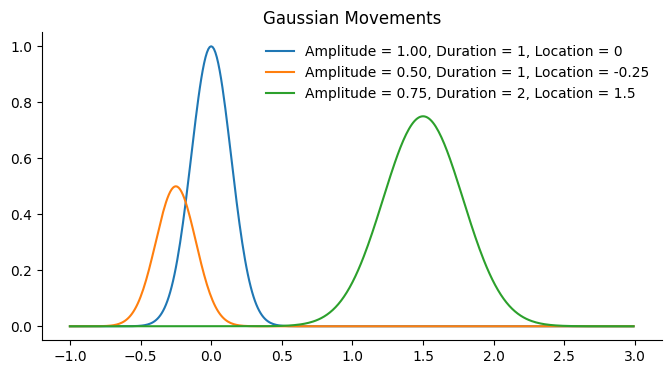

In [13]:
t = np.arange(-1, 3, 0.01)
move1 = movements.gaussian_discrete_movement(amp=1, dur=1, loc=0, time=t)
move2 = movements.gaussian_discrete_movement(amp=0.5, dur=1, loc=-0.25, time=t)
move3 = movements.gaussian_discrete_movement(amp=0.75, dur=2, loc=1.5, time=t)

# Plot the generated Gaussian movement.
fig = plt.figure(figsize=(8, 4))
plt.plot(t, move1, label="Amplitude = 1.00, Duration = 1, Location = 0")
plt.plot(t, move2, label="Amplitude = 0.50, Duration = 1, Location = -0.25")
plt.plot(t, move3, label="Amplitude = 0.75, Duration = 2, Location = 1.5")
plt.title("Gaussian Movements")
plt.legend(loc=1, frameon=False);

We can generate acceleration and jerk of these movements as well.

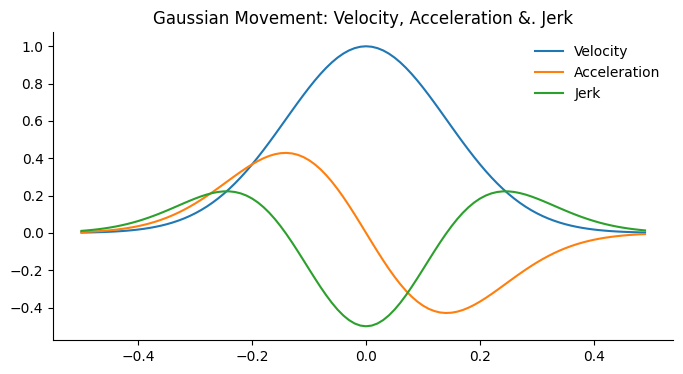

In [14]:
t = np.arange(-0.5, 0.5, 0.01)
vel = movements.gaussian_discrete_movement(amp=1, dur=1, loc=0, time=t, data_type="vel")
accl = movements.gaussian_discrete_movement(amp=1, dur=1, loc=0, time=t, data_type="accl")
jerk = movements.gaussian_discrete_movement(amp=1, dur=1, loc=0, time=t, data_type="jerk")

# Plot the generated Gaussian movement.
fig = plt.figure(figsize=(8, 4))
# Note the scaling factors are to allow better visualization.
plt.plot(t, vel, label="Velocity")
plt.plot(t, 0.1 * accl, label="Acceleration")
plt.plot(t, 0.01 * jerk, label="Jerk")
plt.title("Gaussian Movement: Velocity, Acceleration &. Jerk")
plt.legend(loc=1, frameon=False);

You can similiarly generate minimum jerk movements using ``movements.mjt_discrete_movement``.

## 1.2 Generate rhythmic Gaussian movements

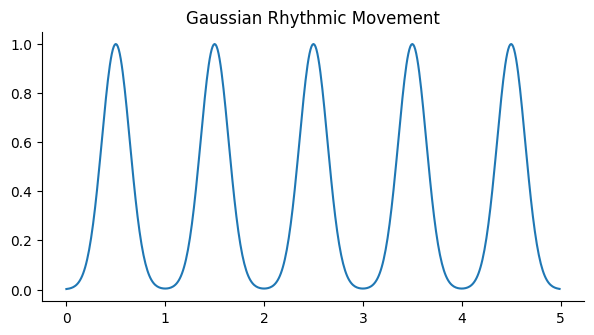

In [15]:
time, move = movements.gaussian_rhytmic_movement(amp=1, dur=1., interval=1.0,
                                                 ts=0.01, n_movements=5)

# Plot the generated Gaussian rhythmic movement.
fig = plt.figure(figsize=(7, 3.5))
plt.plot(time, move)
plt.title("Gaussian Rhythmic Movement");

## 1.3 Movement with random submovements

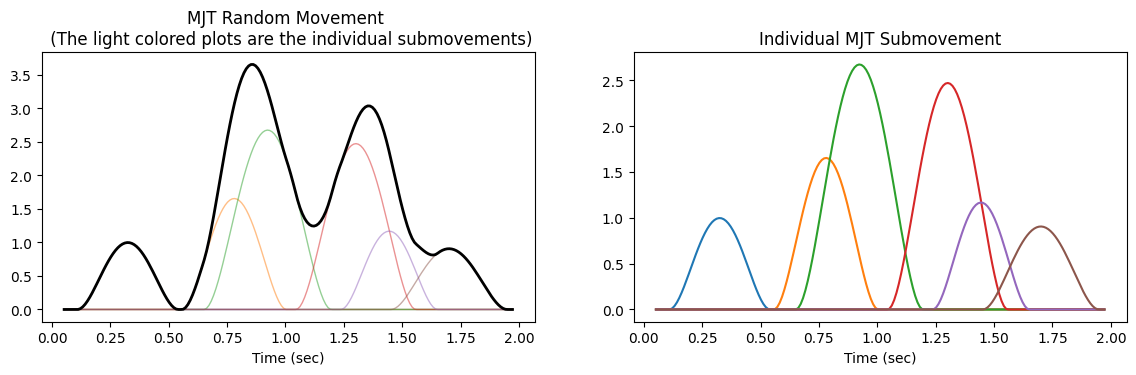

In [31]:
time, move, submove = movements.generate_random_movement(move_type='mjt')

# Plot the generated random MJT movement.
fig = plt.figure(figsize=(14, 3.5))
ax = fig.add_subplot(121)
ax.plot(time, submove.T, lw=1, alpha=0.5)
ax.plot(time, move, color="k", lw=2)
ax.set_xlabel("Time (sec)")
ax.set_title("MJT Random Movement \n (The light colored plots are the individual submovements)");
ax = fig.add_subplot(122)
ax.plot(time, submove.T)
ax.set_xlabel("Time (sec)")
ax.set_title("Individual MJT Submovement");

fig.savefig("random_movement.svg", format="svg")